## Loading important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings


## Loading Data

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df[~df["Unnamed: 2"].isnull()].head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [6]:
df.iloc[5079].values

array(['ham', '\\Keep ur problems in ur heart',
       ' b\'coz nobody will fight for u. Only u &amp; u have to fight for ur self &amp; win the battle. -VIVEKANAND- G 9t.. SD.."',
       nan, nan], dtype=object)

In [487]:
df.iloc[4601].values

array(['ham', '\\Hey j! r u feeling any better',
       ' hopeSo hunny. i amnow feelin ill & ithink i may have tonsolitusaswell! damn iam layin in bedreal bored. lotsof luv me xxxx\\""',
       nan, nan], dtype=object)

In [488]:
df.iloc[281].values

array(['ham', '\\Wen u miss someone',
       ' the person is definitely special for u..... But if the person is so special',
       ' why to miss them', ' just Keep-in-touch\\" gdeve.."'],
      dtype=object)

In [489]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df_copy=df.copy()

In [8]:
df=df.fillna('')

In [10]:
# Concatenating message spilt across 4 columns due to comma seperation
df["new_msg"]=df['v2']+' '+df['Unnamed: 2']+' '+df['Unnamed: 3']+' '+df['Unnamed: 4']

In [11]:
df["new_msg"].head()

0    Go until jurong point, crazy.. Available only ...
1                     Ok lar... Joking wif u oni...   
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: new_msg, dtype: object

In [494]:
df.iloc[281,5]

'\\Wen u miss someone  the person is definitely special for u..... But if the person is so special  why to miss them  just Keep-in-touch\\" gdeve.."'

In [495]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,new_msg
0,ham,"Go until jurong point, crazy.. Available only ...",,,,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,,,,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,,,,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df=df[['v1',"new_msg"]]

In [13]:
df.head()

,v1,new_msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.rename(columns={"v1":"target","new_msg":"message"},inplace=True)

In [15]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.shape

(5572, 2)

In [ ]:
#Check for duplicates

In [17]:
df.duplicated().sum()

403

In [18]:
df=df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

In [20]:
df_copy_1=df.copy()

In [21]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df["target"]=df["target"].apply(lambda x:0 if x=="ham" else 1)

In [23]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [508]:
#df_type_count=df.groupby("target")["target"].count()
#df_type_count/(df_type_count[0]+df_type_count[1])*100

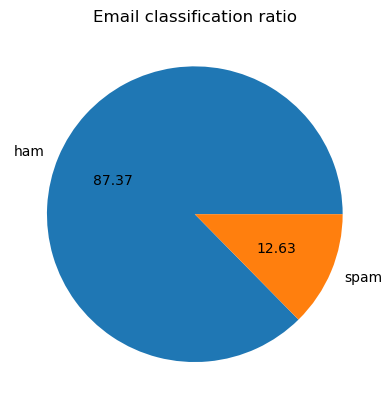

In [24]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct='%0.2f')
plt.title("Email classification ratio")
plt.show()

C:\Users\Home\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


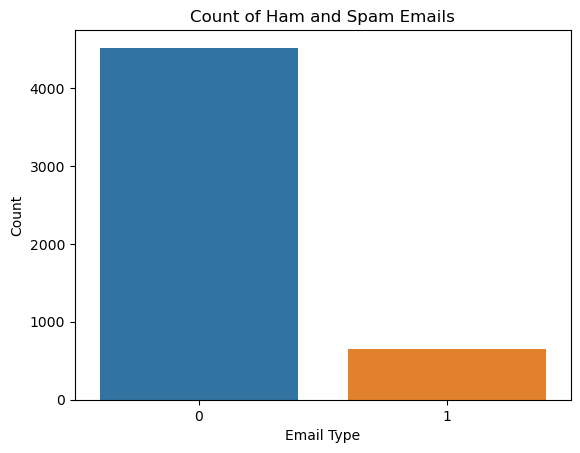

In [26]:
import seaborn as sns
sns.countplot(x="target",data=df)
plt.title('Count of Ham and Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# We will further analyse the emails content to discover any hidden patterns

In [27]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize

In [28]:
df["Full_message_len"]=df["message"].apply(len)

In [29]:
df["Full_message_len"].head()

0    114
1     32
2    158
3     52
4     64
Name: Full_message_len, dtype: int64

In [30]:
df["word_count"]=df["message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df["sent_count"]=df["message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,message,Full_message_len,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",114,24,2
1,0,Ok lar... Joking wif u oni...,32,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,158,37,2
3,0,U dun say so early hor... U c already then say...,52,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",64,15,1


In [33]:
df[df["target"]==0].describe()

,target,Full_message_len,word_count,sent_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,74.049159,17.270815,1.826395
std,0.0,56.695775,13.575169,1.392743
min,0.0,5.000000,1.000000,1.000000
25%,0.0,37.000000,8.000000,1.000000
50%,0.0,56.000000,13.000000,1.000000
75%,0.0,95.000000,22.000000,2.000000
max,0.0,913.000000,220.000000,38.000000


In [34]:
df[df["target"]==1].describe()

,target,Full_message_len,word_count,sent_count
count,653.0,653.000000,653.000000,653.00000
mean,1.0,141.163859,27.750383,2.97856
std,0.0,29.915050,6.978309,1.49010
min,1.0,16.000000,2.000000,1.00000
25%,1.0,135.000000,25.000000,2.00000
50%,1.0,152.000000,29.000000,3.00000
75%,1.0,160.000000,32.000000,4.00000
max,1.0,227.000000,46.000000,9.00000


In [ ]:
# it is an imbalanced dataset.We will take care while evaluating by choosing the right metric.

In [394]:
#df_cat_count.plot(kind='bar',figsize=(6,4),title="distribution of emails",xlabel="email cetgory",ylabel="count")


In [35]:
ham_emails=df[df["target"]==0]
spam_emails=df[df["target"]==1]

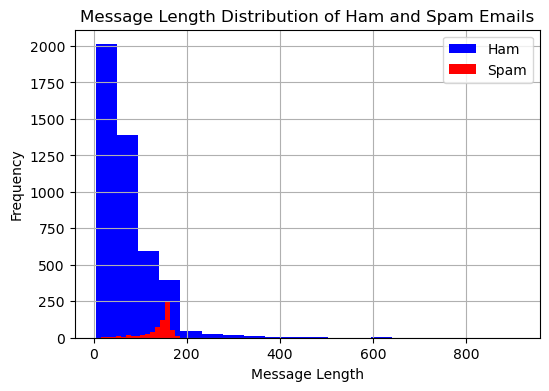

In [36]:
plt.figure(figsize=(6, 4))
plt.hist(ham_emails['Full_message_len'], bins=20, color='blue', label='Ham')
plt.hist(spam_emails['Full_message_len'], bins=20, color='red', label='Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Message Length Distribution of Ham and Spam Emails')
plt.legend()
plt.grid(True)
plt.show()


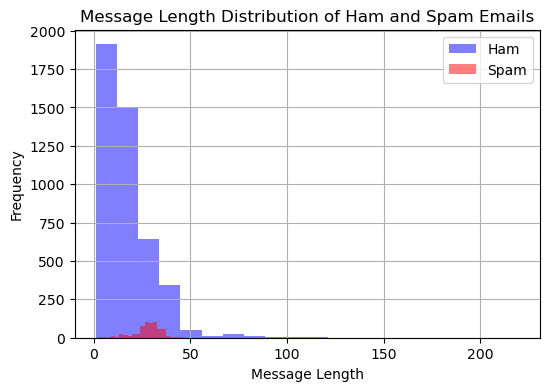

In [37]:
plt.figure(figsize=(6, 4))
plt.hist(ham_emails['word_count'], bins=20, color='blue',alpha=0.5, label='Ham')
plt.hist(spam_emails['word_count'], bins=20, color='red',alpha=0.5, label='Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Message Length Distribution of Ham and Spam Emails')
plt.legend()
plt.grid(True)
plt.show()

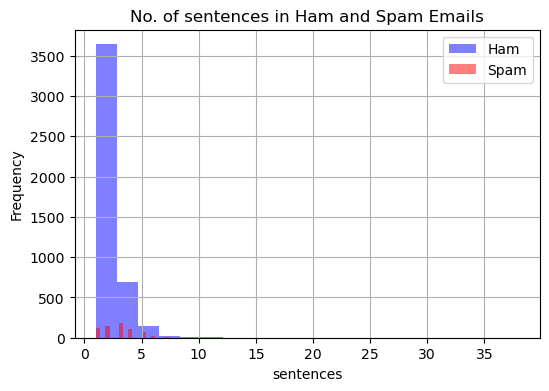

In [38]:
plt.figure(figsize=(6, 4))
plt.hist(ham_emails['sent_count'], bins=20, color='blue',alpha=0.5, label='Ham')
plt.hist(spam_emails['sent_count'], bins=20, color='red',alpha=0.5, label='Spam')
plt.xlabel('sentences')
plt.ylabel('Frequency')
plt.title('No. of sentences in Ham and Spam Emails')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
df.head()

,target,message,Full_message_len,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",114,24,2
1,0,Ok lar... Joking wif u oni...,32,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,158,37,2
3,0,U dun say so early hor... U c already then say...,52,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",64,15,1


<AxesSubplot:>

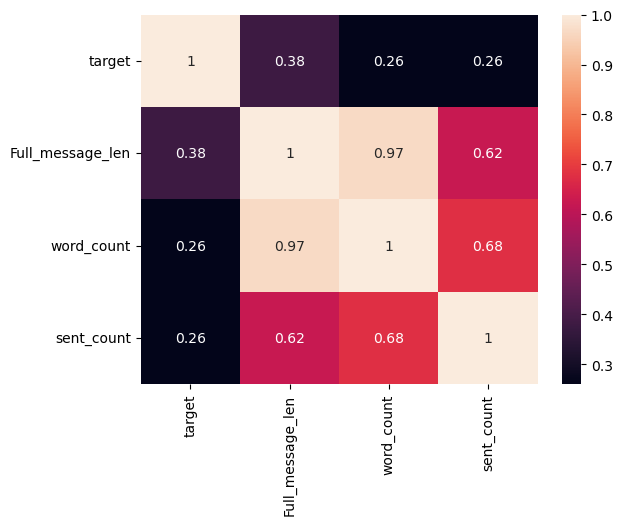

In [40]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#relation of target with message length is significant.
#since message length and number of words and sentences are co-related strongly we will use message length if needed for prediction and drop other two.

# Data Pre-processing

1.Lowercase
2.Tokenization.
3.Removing special chars
4.Removing stop words and punctuations
5.Stemming

### Cleaning the corpus

In [41]:
df.columns

Index(['target', 'message', 'Full_message_len', 'word_count', 'sent_count'], dtype='object')

In [42]:
df["message"][100:150].values

array(['Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx   ',
       "I'm still looking for a car to buy. And have not gone 4the driving test yet.   ",
       "wow. You're right! I didn't mean to do that. I guess once i gave up on boston men and changed my search location to nyc, something changed. Cuz on my signin page it still says boston.   ",
       'Umma my life and vava umma love you lot dear   ',
       'Thanks a lot for your wishes on my birthday. Thanks you for making my birthday truly memorable.   ',
       "Aight, I'll hit you up when I get some cash   ",
       "How would my ip address test that considering my computer isn't a minecraft server   ",
       'I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the one to play jokes...   ',
       "Dont worry. I guess he's busy.   ",
       'What is the plural of the noun research?   ',
       'Going for dinner.msg you after.   ',
       "I'm ok wif it cos 

## Apply Text pre-processing steps:

1. Lower Casing
2. Tokenization
3. Stop Word Removal
4. Stemming/Lemmatization


In [95]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def pre_process_text(text):
    #Lower Casing
    text=text.lower()
    
    #Tokenizing the senetence using nltk tokenizer
    tokenizer=nltk.RegexpTokenizer(r'[^\W\d_]+')
    text_tokens=tokenizer.tokenize(text)
    
    #Remove stopwords
    stop_words=stopwords.words('english')
    more_stopwords = ['u', 'im', 'c','ur']
    stop_words = stop_words + more_stopwords
    text_no_stopword_tokens=[t for t in text_tokens if t not in stop_words]
    
    #Lemmatize
    Lemmatizer=WordNetLemmatizer()
    text_tokens_lematized=[Lemmatizer.lemmatize(t) for t in text_no_stopword_tokens]
    
    return ' '.join(text_tokens_lematized)


In [94]:
# text="Hey! I am surprised ,,but what is the 2 *matter with you <https://click.astro.com>"
# text=text.lower()

# tokenizer=nltk.RegexpTokenizer(r'[^\W\d_]+')
# tokens=tokenizer.tokenize(text)
# print(tokens)

# stop_words=stopwords.words('english')
# more_stopwords = ['u', 'im', 'c','ur']
# stop_words = stop_words + more_stopwords
# text_no_stopword_tokens=[t for t in tokens if t not in stop_words]
# print(text_no_stopword_tokens)

# Lemmatizer=WordNetLemmatizer()
# text_tokens_lematized=[Lemmatizer.lemmatize(t) for t in text_no_stopword_tokens]

# print(' '.join(text_tokens_lematized))

['hey', 'i', 'am', 'surprised', 'but', 'what', 'is', 'the', 'matter', 'with', 'you', 'https', 'click', 'astro', 'com']
['hey', 'surprised', 'matter', 'https', 'click', 'astro', 'com']
hey surprised matter http click astro com


##### Calling pre-processing function

In [96]:
df["message_clean"]=df["message"].apply(pre_process_text)

In [97]:
df.head()

,target,message,Full_message_len,word_count,sent_count,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",114,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,32,8,2,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,158,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,52,13,1,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",64,15,1,nah think go usf life around though


#  wordcloud

In [98]:
df_ham_1=df[df["target"]==0]["message_clean"]
df_spam_1=df[df["target"]==1]["message_clean"]

In [99]:
df_ham_text=' '.join(df_ham_1)
df_spam_text=' '.join(df_spam_1)

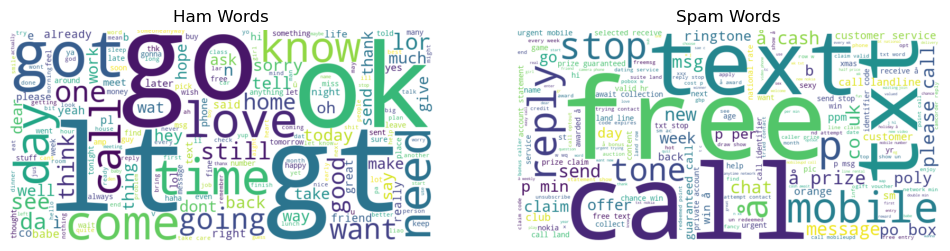

In [100]:
from wordcloud import WordCloud
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(df_ham_text)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(df_spam_text)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.show()

In [101]:
#Let us check out the top n most commonly occuring words in the entire corpus of documents
def Top_occ(text,n):
    from collections import Counter
    tok_email=nltk.word_tokenize(text)
    
    return Counter(tok_email).most_common(n)

In [106]:
top_occ_ham=Top_occ(df_ham_text,10)
top_occ_spam=Top_occ(df_spam_text,10)

In [103]:
top_occ_ham

[('get', 312),
 ('gt', 288),
 ('lt', 287),
 ('go', 275),
 ('ok', 256),
 ('got', 240),
 ('know', 234),
 ('come', 230),
 ('like', 227),
 ('time', 220)]

<AxesSubplot:xlabel='0', ylabel='1'>

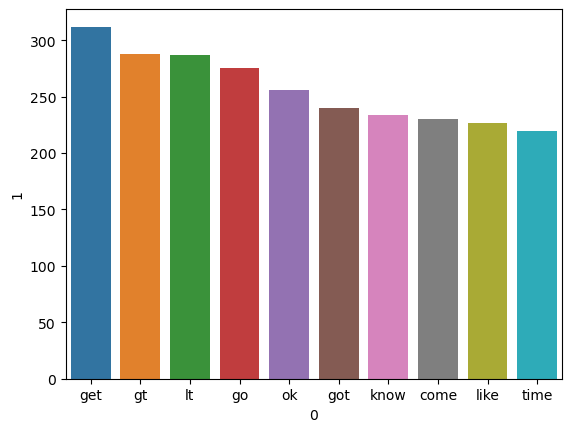

In [105]:
sns.barplot(x=pd.DataFrame(top_occ_ham)[0],y=pd.DataFrame(top_occ_ham)[1])

<AxesSubplot:xlabel='0', ylabel='1'>

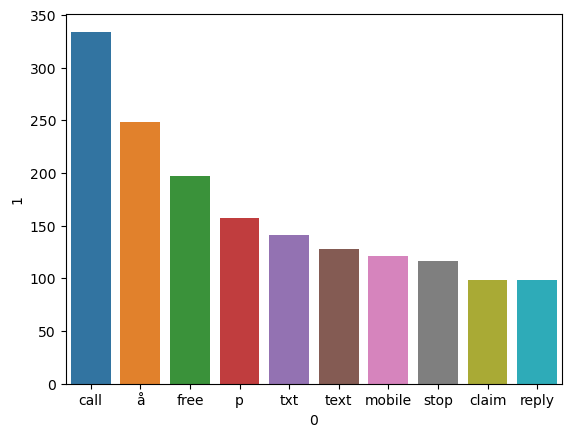

In [107]:
sns.barplot(x=pd.DataFrame(top_occ_spam)[0],y=pd.DataFrame(top_occ_spam)[1])

In [458]:
#sorted_words_top = sorted(top_occ.items(), key=lambda x: x[1], reverse=True)

# MODEL BUILDING

In [ ]:
#Train Test split
#Bag-of-words using count Vectorizer
#Encoding-Tf-idf/Normalisation
#Model training
#Evaluation

# Model Building

In [117]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
mnb = MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()



### Train test split

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X=df["message_clean"]
y=df["target"]

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,stratify=y)

In [223]:
type(X_train)

pandas.core.series.Series

In [135]:
X_train.head()

1517    brand new mobile music service live free music...
410                     come room point iron plan weekend
4003    well pattern emerging friend telling drive com...
4703                                    yar say got error
1337                             buying today ìï need meh
Name: message_clean, dtype: object

In [121]:
print(X_train.shape,' ',X_test.shape,' ',y_train.shape,' ',y_test.shape)

(3876,)   (1293,)   (3876,)   (1293,)


In [122]:
y_train.value_counts(normalize=True)

0    0.873581
1    0.126419
Name: target, dtype: float64

In [123]:
y_test.head()

1038    0
3066    0
2054    0
3180    0
2785    0
Name: target, dtype: int64

### Count Vectorisation

In [124]:
cv=CountVectorizer()

In [125]:
cv.fit(X_train)

CountVectorizer()

In [126]:
x_train_vec = cv.transform(X_train).toarray()
x_test_vec = cv.transform(X_test).toarray()

In [134]:
x_train_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [132]:
#Let us check out few of the vocabulory built along with their index numbers
list(cv.vocabulary_.items())[0:20]

[('brand', 627),
 ('new', 3487),
 ('mobile', 3312),
 ('music', 3410),
 ('service', 4616),
 ('live', 2987),
 ('free', 1978),
 ('player', 3920),
 ('arrive', 290),
 ('shortly', 4693),
 ('install', 2593),
 ('phone', 3873),
 ('browse', 672),
 ('content', 1070),
 ('top', 5425),
 ('artist', 294),
 ('come', 1002),
 ('room', 4438),
 ('point', 3947),
 ('iron', 2637)]

In [138]:
X_train.head().values

array(['brand new mobile music service live free music player arrive shortly install phone browse content top artist',
       'come room point iron plan weekend',
       'well pattern emerging friend telling drive come smoke telling weed fiend make smoke much impede thing see hesitant',
       'yar say got error', 'buying today ìï need meh'], dtype=object)

In [136]:
x_train_vec[0][627]

1

In [139]:
x_train_vec[1][627]

0

In [143]:
x_train_vec[1][1002]

1

In [ ]:
#feature_count=x_train_vec.sum(axis=0)
#max_feature_index=feature_count.argmax()
#feature_names = cv.get_feature_names_out()
#max_feature_name = feature_names[max_feature_index]
#max_feature_name
#min_feature_index=feature_count.argmin()
#min_feature_name = feature_names[min_feature_index]
#min_feature_name

## Naive Bayes Implementation with countvectorizer

In [152]:
# Train the multinomial model
mnb.fit(x_train_vec, y_train)
y_pred1=mnb.predict(x_test_vec)
print("accuracy_score:",accuracy_score(y_test,y_pred1))
print("confusion metric:\n",confusion_matrix(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("classification report:",classification_report(y_test,y_pred1))
y_pred_prob1 = mnb.predict_proba(x_test_vec)



accuracy_score: 0.9876256767208044
confusion metric:
 [[1122    8]
 [   8  155]]
precision score: 0.950920245398773
classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.95      0.95      0.95       163

    accuracy                           0.99      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.99      0.99      0.99      1293



In [151]:
# Train the gaussian model
gnb.fit(x_train_vec, y_train)
y_pred2=gnb.predict(x_test_vec)
print("accuracy_score:",accuracy_score(y_test,y_pred2))
print("confusion metric:\n",confusion_matrix(y_test,y_pred2))
print("precision score:",precision_score(y_test,y_pred2))
print("classification report:",classification_report(y_test,y_pred2))
y_pred_prob2 = mnb.predict_proba(x_test_vec)

accuracy_score: 0.8731631863882444
confusion metric:
 [[982 148]
 [ 16 147]]
precision score: 0.49830508474576274
classification report:               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1130
           1       0.50      0.90      0.64       163

    accuracy                           0.87      1293
   macro avg       0.74      0.89      0.78      1293
weighted avg       0.92      0.87      0.89      1293



In [154]:
# Train the model
bnb.fit(x_train_vec, y_train)
y_pred3=bnb.predict(x_test_vec)
print("accuracy_score:",accuracy_score(y_test,y_pred3))
print("confusion metric:\n",confusion_matrix(y_test,y_pred3))
print("precision score:",precision_score(y_test,y_pred3))
print("classification report:",classification_report(y_test,y_pred3))
y_pred_prob3 = bnb.predict_proba(x_test_vec)

accuracy_score: 0.9767981438515081
confusion metric:
 [[1129    1]
 [  29  134]]
precision score: 0.9925925925925926
classification report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1130
           1       0.99      0.82      0.90       163

    accuracy                           0.98      1293
   macro avg       0.98      0.91      0.94      1293
weighted avg       0.98      0.98      0.98      1293



## Naive Bayes Implementation with tf_idf

In [155]:
tfidf=TfidfVectorizer()

In [156]:
tfidf.fit(X_train)

TfidfVectorizer()

In [157]:
x_train_vec = tfidf.transform(X_train).toarray()
x_test_vec = tfidf.transform(X_test).toarray()

In [158]:
feature_sum=x_train_vec.sum(axis=0)

In [159]:
feature_sum.argmax()

739

In [161]:
x_train_vec[0][657]

0.0

In [629]:
tfidf.get_feature_names_out()[657]

'call'

In [630]:
feature_sum.argmin()

2

In [631]:
tfidf.get_feature_names_out()[2]

'aaniy'

In [163]:
# Train the multinomial model
mnb.fit(x_train_vec, y_train)
y_pred1=mnb.predict(x_test_vec)
print("accuracy_score:",accuracy_score(y_test,y_pred1))
print("confusion metric:\n",confusion_matrix(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("Classification report:",classification_report(y_test,y_pred1))

accuracy_score: 0.9667440061871616
confusion metric:
 [[1130    0]
 [  43  120]]
precision score: 1.0
Classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1130
           1       1.00      0.74      0.85       163

    accuracy                           0.97      1293
   macro avg       0.98      0.87      0.91      1293
weighted avg       0.97      0.97      0.96      1293



Precision=TP/(TP+FP)=106/(106+0)=1   
since we want false possitive to be as less as possible we will look into precision score as metric.
tf_idf and multinomial naive bayes is performing best in this case.

In [165]:
# Train the gaussian model
gnb.fit(x_train_vec, y_train)
y_pred2=gnb.predict(x_test_vec)
print("accuracy_score:",accuracy_score(y_test,y_pred2))
print("confusion metric:",confusion_matrix(y_test,y_pred2))
print("precision score:",precision_score(y_test,y_pred2))
print("Classification report:",classification_report(y_test,y_pred2))

accuracy_score: 0.868522815158546
confusion metric: [[984 146]
 [ 24 139]]
precision score: 0.48771929824561405
Classification report:               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1130
           1       0.49      0.85      0.62       163

    accuracy                           0.87      1293
   macro avg       0.73      0.86      0.77      1293
weighted avg       0.91      0.87      0.88      1293



In [166]:
# Train the model
bnb.fit(x_train_vec, y_train)
y_pred3=bnb.predict(x_test_vec)
print("accuracy_score:",accuracy_score(y_test,y_pred3))
print("confusion metric:",confusion_matrix(y_test,y_pred3))
print("precision score:",precision_score(y_test,y_pred3))
print("Classification report:",classification_report(y_test,y_pred3))

accuracy_score: 0.9767981438515081
confusion metric: [[1129    1]
 [  29  134]]
precision score: 0.9925925925925926
Classification report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1130
           1       0.99      0.82      0.90       163

    accuracy                           0.98      1293
   macro avg       0.98      0.91      0.94      1293
weighted avg       0.98      0.98      0.98      1293



In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [173]:
lgc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='rbf',gamma=1.0,C=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gdbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()




In [174]:
clfs={'LGC':lgc,'SVC':svc,'DTC':dtc,'KNC':knc,'RFC':rfc,'ABC':abc,'BC':bc,'GDBC':gdbc,'ETC':etc,'XGB':xgb,'MNB':mnb}

In [175]:

def train_classifier(clf,x_train_vec, y_train,x_test_vec, y_test):
    clf.fit(x_train_vec, y_train)
    y_pred=clf.predict(x_test_vec)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall(y_test,y_pred)
    confusion_matrix=confusion_matrix(y_test,y_pred)
    return accuracy,precision,recall,confusion_matrix

In [172]:
import time
start_time = time.time()
train_classifier(svc,x_train_vec, y_train,x_test_vec, y_test)
end_time = time.time()
execution_time=end_time-start_time
print("execution time",execution_time)

ValueError: 'RBF' is not in list

In [649]:
y_pred

NameError: name 'y_pred' is not defined

In [664]:
accuracy_scores=[]
precision_scores=[]
Names=[]
from sklearn.metrics import accuracy_score,precision_score
for name,clf in clfs.items():
    start_time = time.time()
    current_accuracy,current_precision,recall,confusion_matrix=train_classifier(clf,x_train_vec, y_train,x_test_vec, y_test)
    end_time = time.time()
    execution time=end_time-start_time
    print("execution time",execution time)
    print("For ",name)
    print("accuracy score",current_accuracy)
    print("precision score",current_precision)
    print("recall",recall)
    print("confusion_matrix",confusion_matrix)
    Names.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  LGC
accuracy score 0.9582366589327146
precision score 0.957983193277311
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  SVC
accuracy score 0.979891724671307
precision score 0.9928057553956835
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  DTC
accuracy score 0.9358081979891725
precision score 0.8636363636363636


C:\Users\Home\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  KNC
accuracy score 0.9064191802010828
precision score 0.9772727272727273
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  RFC
accuracy score 0.974477958236659
precision score 0.9924242424242424
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  ABC
accuracy score 0.962877030162413
precision score 0.8758169934640523
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  BC
accuracy score 0.9621036349574633
precision score 0.8904109589041096
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  GDBC
accuracy score 0.9497293116782676
precision score 0.9711538461538461
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  ETC
accuracy score 0.9752513534416086
precision score 0.9645390070921985
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
For  XGB
accuracy score 0.9706109822119103
precision score 0.9629629629629629
<class 'pandas.core.series.Series'> 

In [672]:
#Converting the result into more viewable form
df_acc_prec = pd.DataFrame({'Name': Names, 'accuracy': accuracy_scores, 'precision': precision_scores})

# Print the DataFrame
print(df_acc_prec.sort_values(by='precision'))

    Name  accuracy  precision
2    DTC  0.935808   0.863636
5    ABC  0.962877   0.875817
6     BC  0.962104   0.890411
0    LGC  0.958237   0.957983
9    XGB  0.970611   0.962963
8    ETC  0.975251   0.964539
7   GDBC  0.949729   0.971154
3    KNC  0.906419   0.977273
4    RFC  0.974478   0.992424
1    SVC  0.979892   0.992806
10   MNB  0.955916   1.000000


In [673]:
x_dum=np.array(["won prize free free free","get back soon","all well","free prize cash","car broke middle","I will call you back when i am free"])


In [ ]:
lgc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gdbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()

In [674]:
y_pred_dummy=lgc.predict(x_dum)

ValueError: Expected 2D array, got 1D array instead:
array=['won prize free free free' 'get back soon' 'all well' 'free prize cash'
 'car broke middle' 'I will call you back when i am free'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [609]:
x_dum1=np.array(["great news","win prize","absolute nuisance idea","free time"])
y_dum1=np.array([0,1,0,0])
x_vec_dum1=cv_dum.transform(x_dum1)

In [607]:
cv_dum.get_feature_names_out()

array(['all', 'back', 'broke', 'car', 'cash', 'free', 'get', 'middle',
       'prize', 'soon', 'well', 'won'], dtype=object)

In [615]:
x_vec_dum1.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [613]:
# Train the dummy model
mnb_dum=MultinomialNB()
mnb_dum.fit(x_vec_dum, y_dum)
y_dum_pred1=mnb_dum.predict(x_vec_dum1)
print("accuracy_score:",accuracy_score(y_dum1,y_dum_pred1))
print("confusion metric:",confusion_matrix(y_dum1,y_dum_pred1))
print("precision score:",precision_score(y_dum1,y_dum_pred1))
y_pred_dum_prob1 = mnb_dum.predict_proba(x_vec_dum1)
print(y_pred_dum_prob1)

accuracy_score: 0.75
confusion metric: [[2 1]
 [0 1]]
precision score: 0.5
[[0.6        0.4       ]
 [0.33333333 0.66666667]
 [0.6        0.4       ]
 [0.23076923 0.76923077]]


In [608]:
x_vec_dum.toarray()

array([[0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [284]:
# Make class and probability predictions
y_pred_class = nb.predict(x_test_vec)
y_pred_prob = nb.predict_proba(x_test_vec)

In [292]:
y_pred_class

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [293]:
y_pred_prob

array([[9.97333939e-01, 2.66606064e-03],
       [9.99422386e-01, 5.77614055e-04],
       [9.99999999e-01, 8.22437350e-10],
       ...,
       [9.99901396e-01, 9.86042857e-05],
       [1.25973056e-06, 9.99998740e-01],
       [9.99882475e-01, 1.17525049e-04]])

In [302]:
np.where(y_pred_class=="spam")[0]

array([   9,   20,   23,   29,   30,   43,   48,   51,   60,   65,   80,
         93,  108,  110,  132,  141,  146,  170,  176,  177,  184,  188,
        193,  198,  212,  214,  218,  219,  220,  221,  234,  237,  244,
        252,  253,  257,  272,  275,  276,  288,  307,  311,  320,  342,
        344,  357,  371,  381,  397,  402,  413,  422,  427,  434,  447,
        449,  452,  454,  461,  462,  477,  493,  499,  502,  508,  509,
        522,  526,  528,  537,  539,  550,  564,  567,  569,  604,  612,
        618,  626,  637,  645,  648,  651,  659,  669,  677,  695,  701,
        710,  721,  727,  741,  751,  761,  776,  783,  784,  793,  801,
        802,  803,  811,  819,  823,  843,  853,  857,  859,  866,  868,
        880,  890,  893,  898,  911,  917,  925,  948,  955,  980,  983,
        986, 1001, 1004, 1005, 1029, 1034, 1037, 1042, 1058, 1076, 1079,
       1086, 1088, 1096, 1097, 1098, 1102, 1106, 1115, 1122, 1124, 1126,
       1127, 1130, 1135, 1140, 1155, 1161, 1162, 11

In [287]:
#When you had label encoded target label this worked to get the index of spam messages.
#nonzero_indices = y_pred_class.nonzero()

In [289]:
X_test.iloc[9]

'subscrib best mobil content servic uk å£ per ten day send stop   helplin     '

In [290]:
X_test.iloc[253]

'   rodger burn   msg   tri call repli sms free nokia mobil   free camcord  pleas call  deliveri tomorrow   '

In [291]:
X_test.iloc[1370]

'award citi break could win å£ summer shop spree everi wk  txt store    skilgm    å£    '

In [308]:
# Example test message

text_message=pd.DataFrame({"message_sample":["Hello, can we meet tomorrow?","FREE! call and win the prize","I am worried about my future","I am free to meet you today","I am in office presently.Can you call me when you are free","I won a prize at school today.I am so happy to share this news","archana paniraj"]})
text_message["clean_message_sample"]=text_message["message_sample"].apply(clean_text)

print(text_message)

# Vectorize the test message
test_message_vectorized = cv.transform(text_message["clean_message_sample"])

# Predict the class (ham or spam)
prediction = nb.predict(test_message_vectorized)
predict_proba=nb.predict_proba(test_message_vectorized)

print("Predicted class:", prediction)
print(predict_proba)

                                      message_sample  \
0                       Hello, can we meet tomorrow?   
1                       FREE! call and win the prize   
2                       I am worried about my future   
3                        I am free to meet you today   
4  I am in office presently.Can you call me when ...   
5  I won a prize at school today.I am so happy to...   
6                                    archana paniraj   

                                clean_message_sample  
0                       hello  can we meet tomorrow   
1                       free  call and win the prize  
2                       i am worried about my future  
3                        i am free to meet you today  
4  i am in office presently can you call me when ...  
5  i won a prize at school today i am so happy to...  
6                                    archana paniraj  
Predicted class: ['ham' 'spam' 'ham' 'ham' 'spam' 'spam' 'ham']
[[9.97846676e-01 2.15332440e-03]
 [3.57309317e-

In [309]:
labels = ["ham", "spam"]

In [310]:
# calculate accuracy of class predictions
train_pred = nb.predict(x_train_vec)

train accuracy: 0.9846853314189997 test accuracy: 0.9763101220387652


<AxesSubplot:>

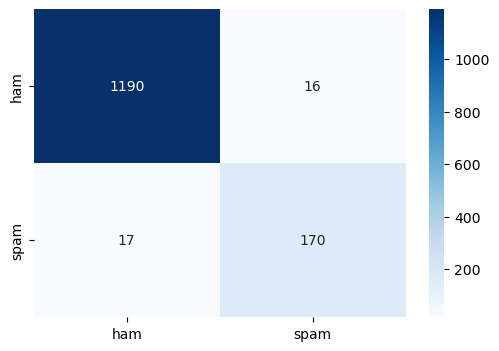

In [314]:
# calculate accuracy of class predictions
from sklearn.metrics import confusion_matrix,accuracy_score
print("train accuracy:",accuracy_score(y_train,train_pred),"test accuracy:",accuracy_score(y_test, y_pred_class))

cm=confusion_matrix(y_test,y_pred_class,labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)

0.9777458722182341


<AxesSubplot:>

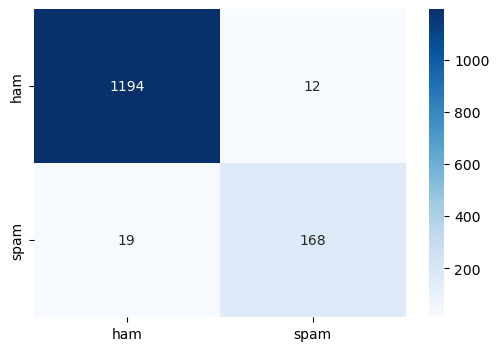

In [231]:
# calculate accuracy of class predictions
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred_class))

cm=confusion_matrix(y_test, y_pred_class,labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)

In [173]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)
y_train_encoded=le.transform(y_train)

In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Example training data


# Create a pipeline with CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english',ngram_range=(1,2), min_df=0.001,max_df=0.9)),
    ('classifier', MultinomialNB())
])

# Define parameter grid for alpha values to search over
param_grid = {'classifier__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['classifier__alpha']
print("Best alpha value:", best_alpha)

Best alpha value: 5.0


In [315]:
# Calculate AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9798334530555779


In [240]:
y_pred_prob

array([6.31410921e-03, 2.31066746e-02, 8.76719348e-07, ...,
       3.41828266e-03, 9.99774541e-01, 1.43851444e-04])

In [270]:
a="12ER"
print(str(a).lower())

12er


In [681]:
y_non_spam_true=np.zeros(90,dtype=int)

In [682]:
y_spam_true=np.ones(10,dtype=int)

In [679]:
y_non_spam_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [684]:
y_true_dummy=np.concatenate((y_non_spam_true,y_spam_true))

In [685]:
y_true_dummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [687]:
y_non_spam_pred=np.zeros(97,dtype=int)

In [688]:
y_spam_pred=np.ones(3,dtype=int)

In [689]:
y_pred_dummy=np.concatenate((y_non_spam_pred,y_spam_pred))

In [690]:
y_pred_dummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [691]:
confusion_mat=confusion_matrix(y_true_dummy,y_pred_dummy)

<AxesSubplot:>

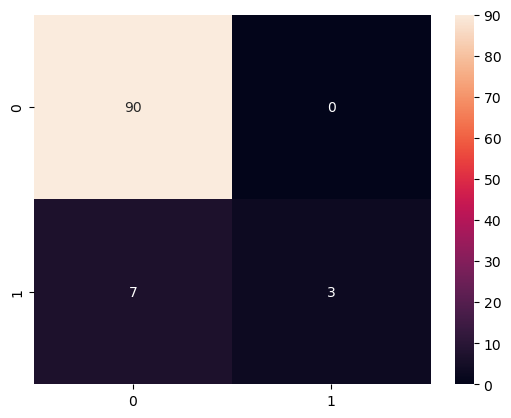

In [693]:
sns.heatmap(confusion_mat,annot=True)

In [694]:
accuracy_score(y_true_dummy,y_pred_dummy)

0.93

In [695]:
precision_score(y_true_dummy,y_pred_dummy)

1.0

In [224]:
a=pd.DataFrame({"a":["good to go","Archana is sweet girl","call free free","win the prize for free","claim the prize","I am good","do you have free time","you are talking rubbish.I have no free time now to hear.Call me later","call and win"]})

In [225]:
a

,a
0,good to go
1,Archana is sweet girl
2,call free free
3,win the prize for free
4,claim the prize
5,I am good
6,do you have free time
7,you are talking rubbish.I have no free time no...
8,call and win


In [226]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [227]:
cv=CountVectorizer(stop_words='english')

In [228]:
cv.fit(a["a"])

CountVectorizer(stop_words='english')

In [239]:
a_vec=cv.transform(a["a"]).toarray()

In [240]:
a_vec

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [237]:
cv.vocabulary_.items()

dict_items([('good', 4), ('archana', 0), ('sweet', 9), ('girl', 3), ('free', 2), ('win', 12), ('prize', 7), ('claim', 1), ('time', 11), ('talking', 10), ('rubbish', 8), ('hear', 5), ('later', 6)])

In [238]:
sorted(cv.vocabulary_.items(),key=lambda x:x[1])

[('archana', 0),
 ('claim', 1),
 ('free', 2),
 ('girl', 3),
 ('good', 4),
 ('hear', 5),
 ('later', 6),
 ('prize', 7),
 ('rubbish', 8),
 ('sweet', 9),
 ('talking', 10),
 ('time', 11),
 ('win', 12)]

In [233]:
cv.get_feature_names_out(cv.vocabulary_.items())

array(['archana', 'claim', 'free', 'girl', 'good', 'hear', 'later',
       'prize', 'rubbish', 'sweet', 'talking', 'time', 'win'],
      dtype=object)

In [274]:
from sklearn.naive_bayes import MultinomialNB
mnb_dummy=MultinomialNB(alpha=0)
mnb_dummy.fit(a_vec,[0,0,1,1,1,0,0,0,1])

C:\Users\Home\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


MultinomialNB(alpha=0)

In [270]:
texts = ['this is the first document', 'this document is the second document',"when you arefree call me.I have to discuss some important"]

In [275]:
mnb_dummy.predict(cv.transform(texts))

array([0, 0, 0])

In [272]:
mnb_dummy.coef_

C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[-25.10529247,  -2.07944154,  -0.98082925, -25.10529247,
        -25.10529247, -25.10529247, -25.10529247,  -1.38629436,
        -25.10529247, -25.10529247, -25.10529247, -25.10529247,
         -1.38629436]])

In [273]:
mnb_dummy.predict_proba(cv.transform(texts))

array([[0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444]])

In [ ]:
https://github.com/AHMEDSANA/Spam-and-Ham-text-classifier